In [ ]:
!pip install tensorflow_hub

In [5]:
!pip install tensorflow_datasets

  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21502 sha256=94af7f637b03ec1c1c9bd6a8857d1887274db892ed08cd4ab5dc7b608e8cb885
  Stored in directory: c:\users\adel\appdata\local\pip\cache\wheels\e1\e8\83\ddea66100678d139b14bc87692ece57c6a2a937956d2532608
Successfully built promise


In [1]:
!pip install tflite-model-maker

ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23154 sha256=2e2e15dd4069dcd457f745cbe1ffdf00a732d6c949c61a97887e0f5210969493
  Stored in directory: c:\users\adel\appdata\local\pip\cache\wheels\a2\a3\bd\ec1568ce7515115a11ab686d509ad302124c782af065de47ee
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115943 sha256=275d197f3170651263794b31e3a3fcc9a8371643caa09bde578d89e7a94c3a4d
  Stored in directory: c:\users\adel\appdata\local\pip\cache\wheels\2a\93\86\8cd17bc6c40fb605c3ac549d0b860ef7e84ee5f67bf01a3287
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=58114adb87de71e9ac603e8f7fc2265d9fa815554e464ebbf2cfdfe70874b5e5
  Stored in directory: c:\users\adel\appdata\local\pip\cache\wheels\ac\b2\c3\fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22258 sha256=de4560912f54cb680ebec3b732cd42ed489baecbcbdf5e0916df67aeb0013dee


In [1]:
import os
import tensorflow as tf
from tensorflow import keras

In [3]:
import zipfile

local_zip = "E:\project plan\indonesian food.zip"

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('./data')
zip_ref.close()

In [2]:
train_dir = os.path.join('./data/indonesian food', 'train')
validation_dir = os.path.join('./data/indonesian food', 'validation')
test_dir = os.path.join('./data/indonesian food', 'test')

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255
                                   
                                   )

test_datagen  = ImageDataGenerator(rescale = 1.0/255
                                   )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=16,
                                                         class_mode  = 'categorical',
                                                         target_size=(150, 150))

Found 1759 images belonging to 11 classes.
Found 220 images belonging to 11 classes.


In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(11, activation='softmax')
])

model.summary()

model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 36, 36, 64)       

In [24]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])

In [30]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
inception_v3 = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"

feature_extractor_model = inception_v3

In [31]:
import tensorflow_hub as hub

feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=False)

In [32]:
model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(11)
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 2048)              21802784  
                                                                 
 dense_5 (Dense)             (None, 11)                22539     
                                                                 
Total params: 21,825,323
Trainable params: 22,539
Non-trainable params: 21,802,784
_________________________________________________________________


In [36]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [28]:
from keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=100,
                    verbose=1,
                    callbacks=early)

Epoch 1/100
110/110 [==============================] - 59s 527ms/step - loss: 2.4260 - accuracy: 0.1001 - val_loss: 2.3672 - val_accuracy: 0.2091
Epoch 2/100
110/110 [==============================] - 56s 507ms/step - loss: 2.2661 - accuracy: 0.1740 - val_loss: 2.2129 - val_accuracy: 0.3364
Epoch 3/100
110/110 [==============================] - 56s 508ms/step - loss: 2.0416 - accuracy: 0.2877 - val_loss: 1.9962 - val_accuracy: 0.3818
Epoch 4/100
110/110 [==============================] - 56s 505ms/step - loss: 1.9046 - accuracy: 0.3371 - val_loss: 1.9042 - val_accuracy: 0.3909
Epoch 5/100
110/110 [==============================] - 56s 509ms/step - loss: 1.8016 - accuracy: 0.3854 - val_loss: 1.8059 - val_accuracy: 0.4091
Epoch 6/100
110/110 [==============================] - 56s 511ms/step - loss: 1.6720 - accuracy: 0.4213 - val_loss: 1.7113 - val_accuracy: 0.4591
Epoch 7/100
110/110 [==============================] - 56s 506ms/step - loss: 1.5117 - accuracy: 0.4952 - val_loss: 1.6322 -

Text(0.5, 1.0, 'Training and validation loss')

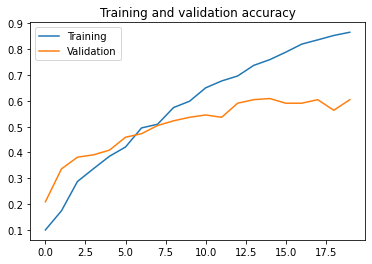

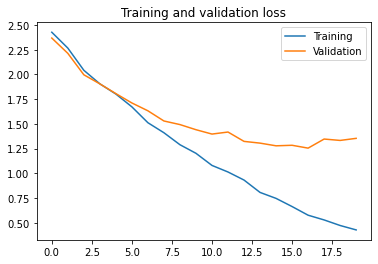

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

In [48]:
saved_model = "saved_model"
tf.saved_model.save(model, saved_model)

INFO:tensorflow:Assets written to: saved_model\assets


In [54]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

ValueError: invalid mode: 'ws'

In [19]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=20
)

Found 200 images belonging to 11 classes.


In [30]:
results = model.evaluate(test_generator)

10/10 [==============================] - 3s 235ms/step - loss: 1.4968 - accuracy: 0.5850


In [45]:
print('test loss, test acc:', results)

test loss, test acc: [1.5188572406768799, 0.5400000214576721]


In [10]:
#Training
train_kue_dadar_gulung_dir = os.path.join(train_dir, 'kue_dadar_gulung')
train_kue_kastengel_dir = os.path.join(train_dir, 'kue_kastengel')
train_kue_klepon_dir = os.path.join(train_dir, 'kue_klepon')
train_kue_lapis_dir = os.path.join(train_dir, 'kue_lapis')
train_kue_lumpur_dir = os.path.join(train_dir, 'kue_lumpur')
train_kue_putri_salju_dir = os.path.join(train_dir, 'kue_putri_salju')
train_kue_risoles_dir = os.path.join(train_dir, 'kue_risoles')
train_kue_serabi_dir = os.path.join(train_dir, 'kue_serabi')
train_bakso_dir = os.path.join(train_dir, 'bakso')
train_gudeg_dir = os.path.join(train_dir, 'gudeg')
train_sate_dir = os.path.join(train_dir, 'sate')
train_gado_dir = os.path.join(train_dir, 'gado')
train_rendang_dir = os.path.join(train_dir, 'rendang')

#Validation
validation_kue_dadar_gulung_dir = os.path.join(validation_dir, 'kue_dadar_gulung')
validation_kue_kastengel_dir = os.path.join(validation_dir, 'kue_kastengel')
validation_kue_klepon_dir = os.path.join(validation_dir, 'kue_klepon')
validation_kue_lapis_dir = os.path.join(validation_dir, 'kue_lapis')
validation_kue_lumpur_dir = os.path.join(validation_dir, 'kue_lumpur')
validation_kue_putri_salju_dir = os.path.join(validation_dir, 'kue_putri_salju')
validation_kue_risoles_dir = os.path.join(validation_dir, 'kue_risoles')
validation_kue_serabi_dir = os.path.join(validation_dir, 'kue_serabi')

In [11]:
print('total training kue lumpur images :', len(os.listdir(train_kue_dadar_gulung_dir) ))
print('total training kue lumpur images :', len(os.listdir(train_kue_kastengel_dir) ))
print('total training kue lumpur images :', len(os.listdir(train_kue_klepon_dir) ))
print('total training kue lumpur images :', len(os.listdir(train_kue_lapis_dir) ))
print('total training kue lumpur images :', len(os.listdir(train_kue_lumpur_dir) ))
print('total training kue lumpur images :', len(os.listdir(train_kue_putri_salju_dir) ))
print('total training kue lumpur images :', len(os.listdir(train_kue_risoles_dir) ))
print('total training kue lumpur images :', len(os.listdir(train_kue_serabi_dir) ))
print('total training bakso images :', len(os.listdir(train_bakso_dir) ))
print('total training kue lumpur images :', len(os.listdir(train_gudeg_dir) ))
print('total training kue lumpur images :', len(os.listdir(train_sate_dir) ))
print('total training kue lumpur images :', len(os.listdir(train_gado_dir) ))
print('total training kue lumpur images :', len(os.listdir(train_rendang_dir) ))

print('total training kue lumpur images :', len(os.listdir(validation_kue_dadar_gulung_dir) ))
print('total training kue lumpur images :', len(os.listdir(validation_kue_kastengel_dir) ))
print('total training kue lumpur images :', len(os.listdir(validation_kue_klepon_dir) ))
print('total training kue lumpur images :', len(os.listdir(validation_kue_lapis_dir) ))
print('total training kue lumpur images :', len(os.listdir(validation_kue_lumpur_dir) ))
print('total training kue lumpur images :', len(os.listdir(validation_kue_putri_salju_dir) ))
print('total training kue lumpur images :', len(os.listdir(validation_kue_risoles_dir) ))
print('total training kue lumpur images :', len(os.listdir(validation_kue_serabi_dir) ))

total training kue lumpur images : 160
total training kue lumpur images : 160
total training kue lumpur images : 160
total training kue lumpur images : 160
total training kue lumpur images : 160
total training kue lumpur images : 160
total training kue lumpur images : 160
total training kue lumpur images : 160
total training bakso images : 160
total training kue lumpur images : 160
total training kue lumpur images : 160
total training kue lumpur images : 160
total training kue lumpur images : 160
total training kue lumpur images : 20
total training kue lumpur images : 20
total training kue lumpur images : 20
total training kue lumpur images : 20
total training kue lumpur images : 20
total training kue lumpur images : 20
total training kue lumpur images : 20
total training kue lumpur images : 20


In [35]:
#Transfer Learning
from keras.applications.vgg16 import VGG16
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     